# Section 3: Explainability Analysis and Ablation Studies
## Online Shoppers Dataset - Model Interpretability

This notebook provides comprehensive explainability analysis and ablation studies for the trained models.

**Analysis Components:**
- **Feature Importance**: Built-in and permutation-based importance
- **SHAP Analysis**: Shapley Additive Explanations for model predictions
- **LIME Analysis**: Local Interpretable Model-agnostic Explanations
- **Ablation Studies**: Feature ablation, hyperparameter sensitivity
- **Cross-Model Comparison**: Feature importance consensus across models

**Models Analyzed:**
- XGBoost, TabPFN v2, TabICL, FT-Transformer
- Focus on understanding what drives purchase prediction decisions
- Identify most important features for online shopping behavior

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import our custom analysis frameworks
from explainability_analysis import ExplainabilityAnalyzer, clear_memory, save_intermediate_results,load_intermediate_results
from enhanced_evaluation import ComprehensiveEvaluator

# Memory management utilities
import gc
import pickle
import os

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 Section 3: Explainability Analysis and Ablation Studies")
print("Dataset: Online Shoppers Purchasing Intention")

🔍 Section 3: Explainability Analysis and Ablation Studies
Dataset: Online Shoppers Purchasing Intention


## 3.1 Load Trained Models and Data

In [2]:
# Load trained models and results from Section 2
try:
    with open('./online_shoppers_section2_results.pkl', 'rb') as f:
        section2_data = pickle.load(f)

    # Extract variables
    models = section2_data['models']
    evaluator = section2_data['evaluator']
    X_train_scaled = section2_data['X_train_scaled']
    X_val_scaled = section2_data['X_val_scaled']
    X_test_scaled = section2_data['X_test_scaled']
    y_train = section2_data['y_train']
    y_val = section2_data['y_val']
    y_test = section2_data['y_test']
    feature_names = section2_data['feature_names']
    month_mapping = section2_data['month_mapping']
    visitor_mapping = section2_data['visitor_mapping']
    class_names = section2_data['class_names']
    label_encoder_month = section2_data['label_encoder_month']
    label_encoder_visitor = section2_data['label_encoder_visitor']
    scaler = section2_data['scaler']
    data_summary = section2_data['data_summary']
    comparison_df = section2_data['comparison_df']

    print("✅ Section 2 results loaded successfully!")
    print(f"Models available: {list(models.keys())}")
    print(f"Features: {len(feature_names)}")
    print(f"Classes: {len(class_names)}")
    print(f"Test samples: {len(X_test_scaled):,}")
    
    # Display feature names for reference
    print(f"\n📋 Feature Names:")
    for i, feature in enumerate(feature_names):
        print(f"   {i+1:2d}. {feature}")

except FileNotFoundError:
    print("❌ Section 2 results not found!")
    print("Please run Section 2 (Model Training) notebook first.")
    raise

✅ Section 2 results loaded successfully!
Models available: ['XGBoost', 'TabPFN v2', 'TabICL', 'FT-Transformer']
Features: 17
Classes: 2
Test samples: 2,466

📋 Feature Names:
    1. Administrative
    2. Administrative_Duration
    3. Informational
    4. Informational_Duration
    5. ProductRelated
    6. ProductRelated_Duration
    7. BounceRates
    8. ExitRates
    9. PageValues
   10. SpecialDay
   11. Month
   12. OperatingSystems
   13. Browser
   14. Region
   15. TrafficType
   16. VisitorType
   17. Weekend


## 3.2 Initialize Explainability Analyzer

In [3]:
# Initialize explainability analyzer with online shoppers feature names
explainer = ExplainabilityAnalyzer(feature_names=feature_names)

print("🔧 Explainability analyzer initialized")
print(f"Feature names: {feature_names[:5]}...")
print(f"Total features: {len(feature_names)}")
print(f"Class names: {class_names}")

# Initialize storage for intermediate results
intermediate_results = {}

🔧 Explainability analyzer initialized
Feature names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated']...
Total features: 17
Class names: ['No Purchase', 'Purchase']


## 3.3 XGBoost Explainability Analysis


XGBOOST EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for XGBoost


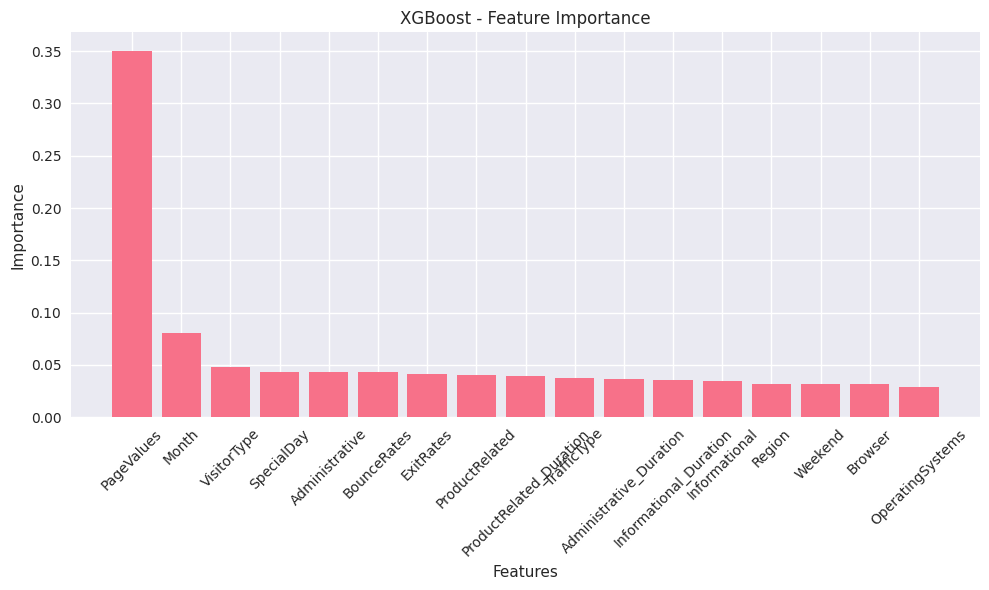

✅ Feature importance analysis completed for XGBoost
🔄 Computing permutation importance for XGBoost...


<Figure size 800x550 with 0 Axes>

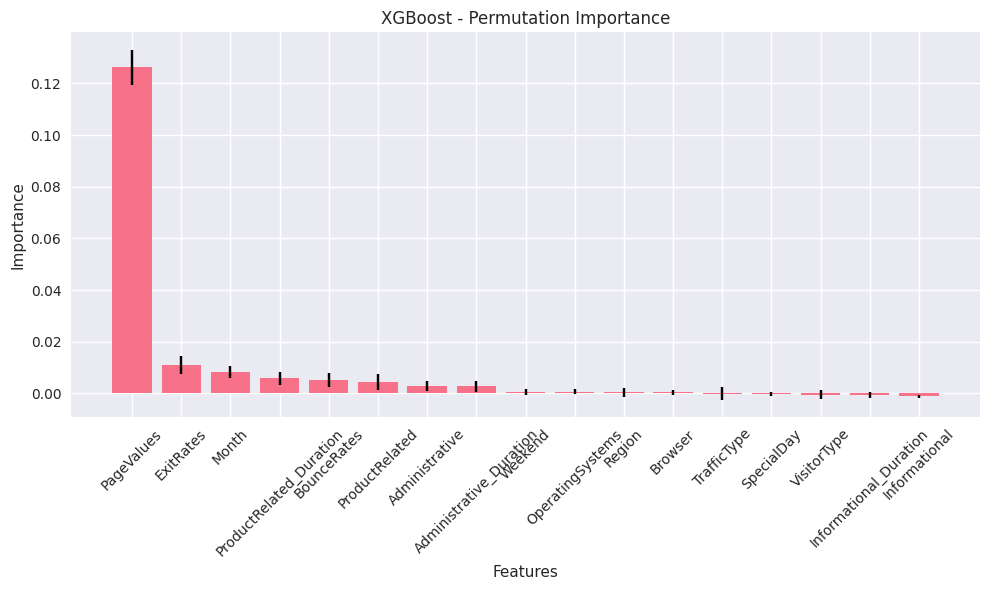

✅ Permutation importance analysis completed for XGBoost
🔄 Computing SHAP values for XGBoost...
🧹 Memory cleared
   Processing batch 1/20
🧹 Memory cleared
   Processing batch 2/20
🧹 Memory cleared
   Processing batch 3/20
🧹 Memory cleared
   Processing batch 4/20
🧹 Memory cleared
   Processing batch 5/20
🧹 Memory cleared
   Processing batch 6/20
🧹 Memory cleared
   Processing batch 7/20
🧹 Memory cleared
   Processing batch 8/20
🧹 Memory cleared
   Processing batch 9/20
🧹 Memory cleared
   Processing batch 10/20
🧹 Memory cleared
   Processing batch 11/20
🧹 Memory cleared
   Processing batch 12/20
🧹 Memory cleared
   Processing batch 13/20
🧹 Memory cleared
   Processing batch 14/20
🧹 Memory cleared
   Processing batch 15/20
🧹 Memory cleared
   Processing batch 16/20
🧹 Memory cleared
   Processing batch 17/20
🧹 Memory cleared
   Processing batch 18/20
🧹 Memory cleared
   Processing batch 19/20
🧹 Memory cleared
   Processing batch 20/20
🧹 Memory cleared


<Figure size 800x550 with 0 Axes>

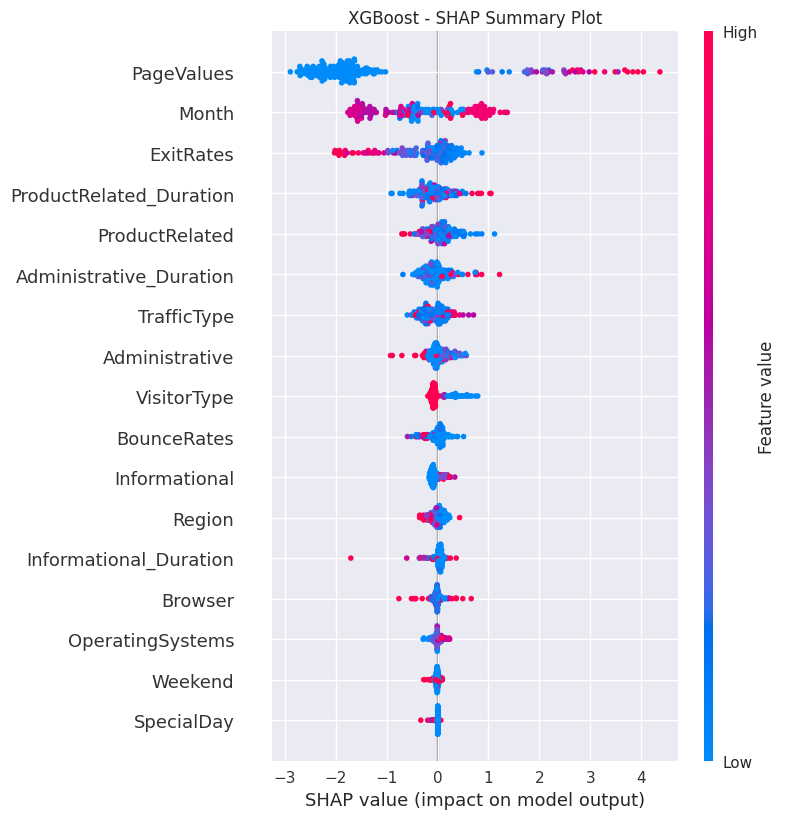

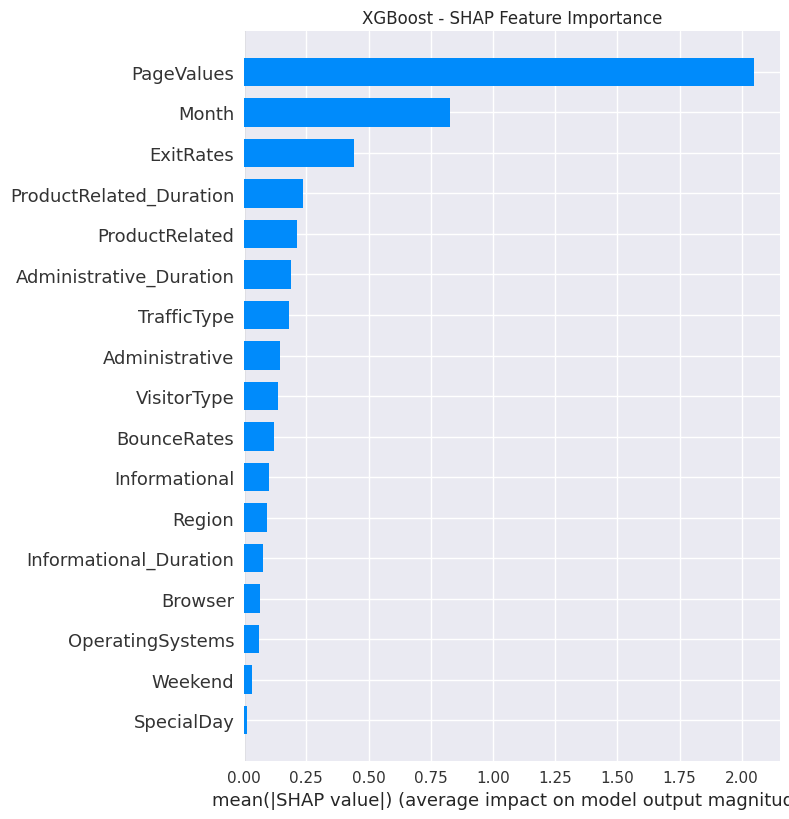

✅ SHAP analysis completed for XGBoost
🔄 Computing LIME explanations for XGBoost...


<Figure size 800x550 with 0 Axes>

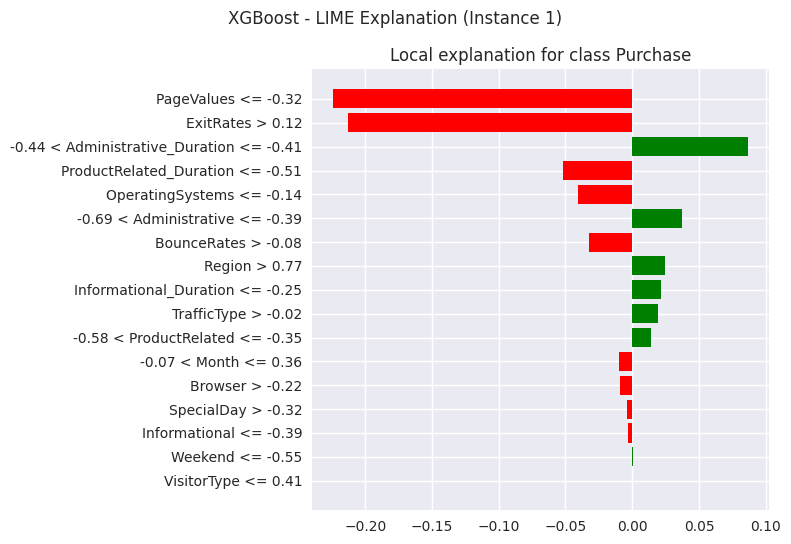

<Figure size 800x550 with 0 Axes>

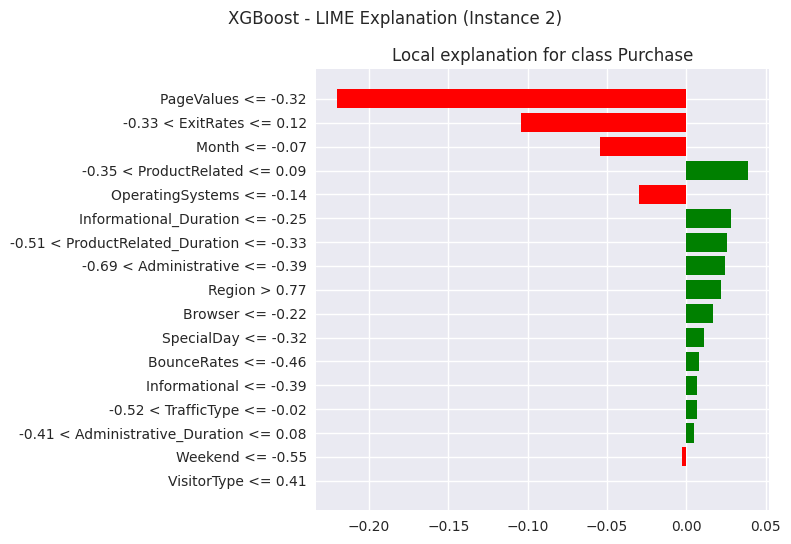

<Figure size 800x550 with 0 Axes>

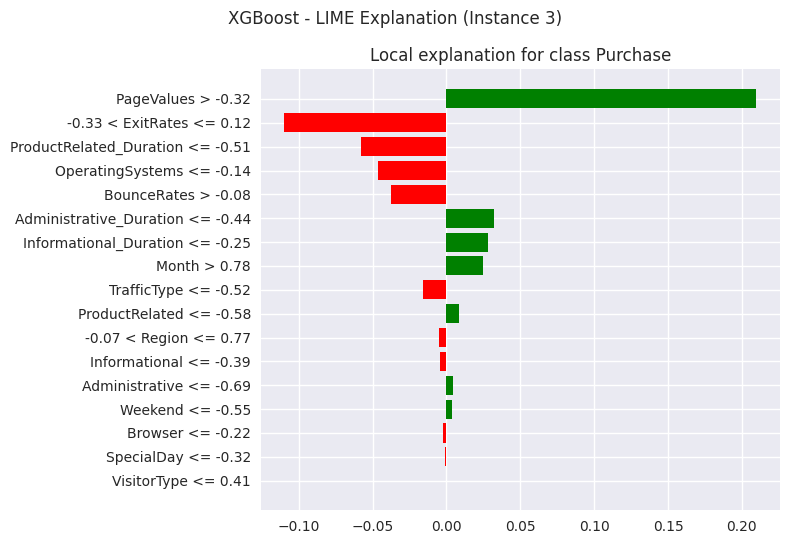

✅ LIME analysis completed for XGBoost
💾 Intermediate results saved to online_shoppers_xgb_explanations.pkl
✅ XGBoost explainability analysis completed

🎯 Top 10 Most Important Features (XGBoost):
    1. PageValues: 0.3505
    2. Month: 0.0806
    3. VisitorType: 0.0480
    4. SpecialDay: 0.0436
    5. Administrative: 0.0433
    6. BounceRates: 0.0432
    7. ExitRates: 0.0414
    8. ProductRelated: 0.0405
    9. ProductRelated_Duration: 0.0398
   10. TrafficType: 0.0370
🧹 Memory cleared


<Figure size 800x550 with 0 Axes>

In [11]:
# Analyze XGBoost explainability (most interpretable)
if 'XGBoost' in models:
    print("\n" + "="*60)
    print("XGBOOST EXPLAINABILITY ANALYSIS")
    print("="*60)

    xgb_explanations = explainer.analyze_model_explainability(
        models['XGBoost'], "XGBoost", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=200  # Increased for online shoppers dataset
    )

    # Save intermediate results
    intermediate_results['xgb_explanations'] = xgb_explanations
    save_intermediate_results({
        'xgb_explanations': xgb_explanations,
        'explainer_state': explainer.explanations
    }, 'online_shoppers_xgb_explanations.pkl')

    print("✅ XGBoost explainability analysis completed")
    
    # Display top features for XGBoost
    if 'XGBoost' in explainer.explanations and 'feature_importance' in explainer.explanations['XGBoost']:
        importances = explainer.explanations['XGBoost']['feature_importance']['importances']
        indices = np.argsort(importances)[::-1][:10]
        print("\n🎯 Top 10 Most Important Features (XGBoost):")
        for i, idx in enumerate(indices):
            print(f"   {i+1:2d}. {feature_names[idx]}: {importances[idx]:.4f}")
    
    clear_memory()

else:
    print("⚠️ XGBoost model not available")

## 3.4 TabPFN v2 Explainability Analysis


TABPFN V2 EXPLAINABILITY ANALYSIS

🔍 Explainability Analysis for TabPFN v2
⚠️  TabPFN v2 doesn't have built-in feature importance
🔄 Computing permutation importance for TabPFN v2...


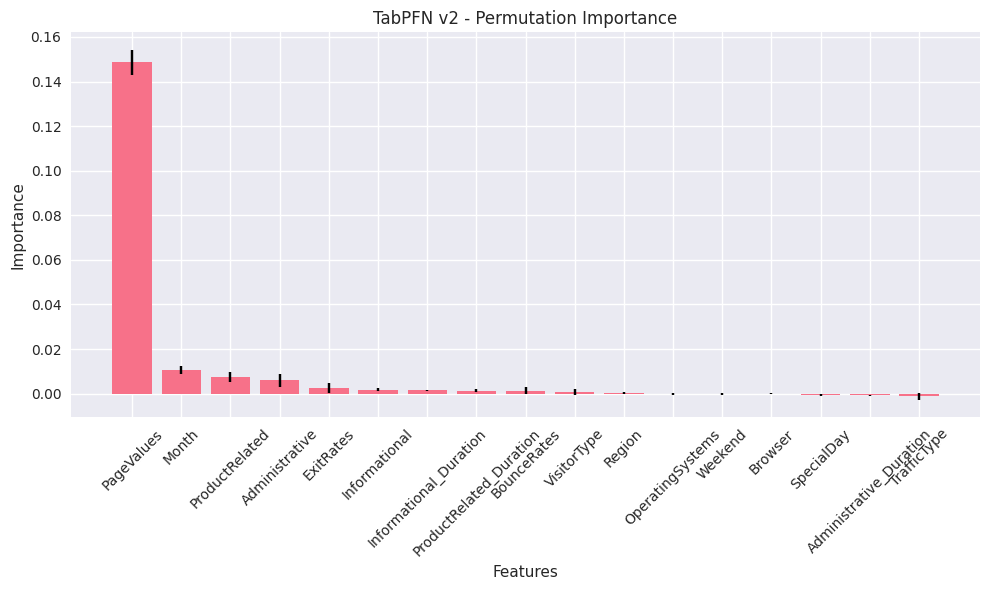

✅ Permutation importance analysis completed for TabPFN v2
🔄 Computing LIME explanations for TabPFN v2...


<Figure size 800x550 with 0 Axes>

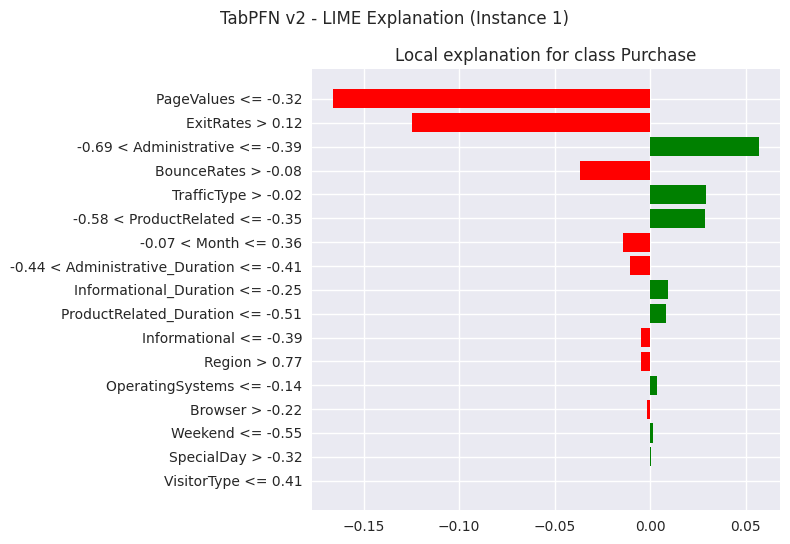

<Figure size 800x550 with 0 Axes>

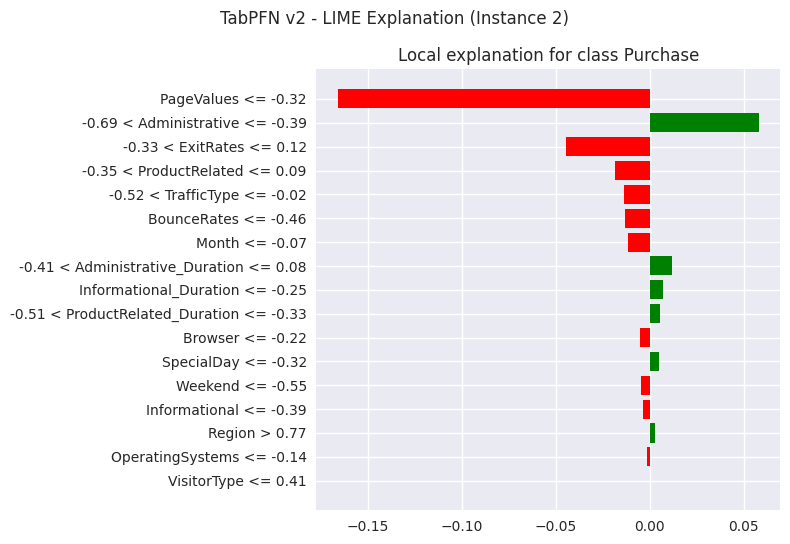

<Figure size 800x550 with 0 Axes>

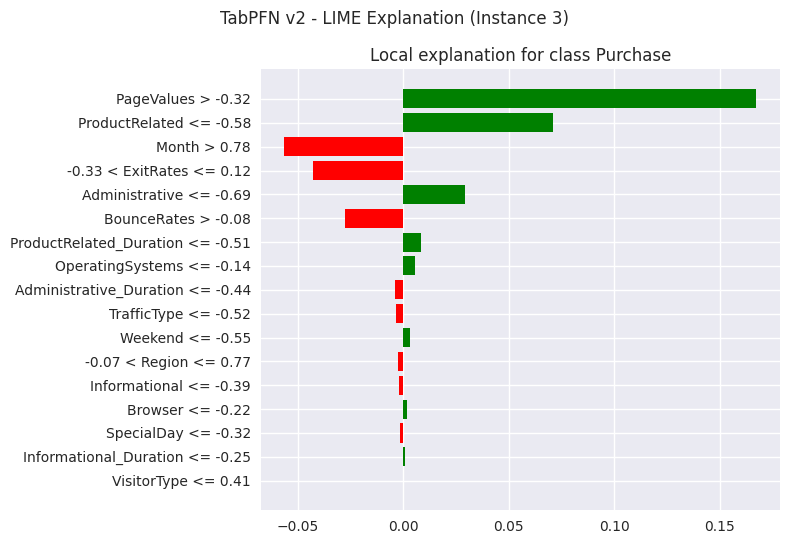

✅ LIME analysis completed for TabPFN v2
💾 Intermediate results saved to online_shoppers_tabpfn_explanations.pkl
✅ TabPFN v2 explainability analysis completed
💾 Results saved before proceeding to TabICL

🎯 Top 10 Most Important Features (TabPFN v2 - Permutation):
    1. PageValues: 0.1486
    2. Month: 0.0105
    3. ProductRelated: 0.0074
    4. Administrative: 0.0060
    5. ExitRates: 0.0024
    6. Informational: 0.0018
    7. Informational_Duration: 0.0015
    8. ProductRelated_Duration: 0.0014
    9. BounceRates: 0.0013
   10. VisitorType: 0.0009
🧹 Memory cleared


<Figure size 800x550 with 0 Axes>

In [12]:
# Analyze TabPFN v2 explainability
if 'TabPFN v2' in models:
    print("\n" + "="*60)
    print("TABPFN V2 EXPLAINABILITY ANALYSIS")
    print("="*60)

    tabpfn_explanations = explainer.analyze_model_explainability(
        models['TabPFN v2'], "TabPFN v2", 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=200
    )

    # Save intermediate results after TabPFN
    intermediate_results['tabpfn_explanations'] = tabpfn_explanations
    intermediate_data = {
        'explainer_state': explainer.explanations,
        'tabpfn_explanations': tabpfn_explanations,
        'models_completed': ['XGBoost', 'TabPFN v2']
    }
    save_intermediate_results(intermediate_data, 'online_shoppers_tabpfn_explanations.pkl')

    print("✅ TabPFN v2 explainability analysis completed")
    print("💾 Results saved before proceeding to TabICL")
    
    # Display top features for TabPFN v2 (permutation importance)
    if 'TabPFN v2' in explainer.explanations and 'permutation_importance' in explainer.explanations['TabPFN v2']:
        importances = explainer.explanations['TabPFN v2']['permutation_importance']['importances_mean']
        indices = np.argsort(importances)[::-1][:10]
        print("\n🎯 Top 10 Most Important Features (TabPFN v2 - Permutation):")
        for i, idx in enumerate(indices):
            print(f"   {i+1:2d}. {feature_names[idx]}: {importances[idx]:.4f}")
    
    clear_memory()

else:
    print("⚠️ TabPFN v2 model not available")

## 3.5 TabICL Explainability Analysis

In [ ]:
# Memory management before TabICL
print("\n" + "="*60)
print("MEMORY MANAGEMENT BEFORE TABICL")
print("="*60)

# Clear all unnecessary variables and run aggressive garbage collection
print("🧹 Clearing memory before TabICL analysis...")

# Clear large data structures temporarily
temp_X_train = X_train_scaled.copy()
temp_X_test = X_test_scaled.copy()
temp_y_train = y_train.copy()
temp_y_test = y_test.copy()

# Delete large variables temporarily
if 'section2_data' in locals():
    del section2_data

# Run aggressive garbage collection
gc.collect()
gc.collect()  # Run twice for better cleanup

print("🧹 Memory cleared successfully")
print("📊 Proceeding with TabICL analysis using minimal memory footprint")

# Analyze TabICL explainability
if 'TabICL' in models:
    print("\n" + "="*60)
    print("TABICL EXPLAINABILITY ANALYSIS")
    print("="*60)

    tabicl_explanations = explainer.analyze_model_explainability(
        models['TabICL'], "TabICL", 
        temp_X_train, temp_X_test, temp_y_train, temp_y_test,
        max_samples=200
    )
    
    # Save results after TabICL attempt
    intermediate_results['tabicl_explanations'] = tabicl_explanations
    save_intermediate_results({
        'explainer_state': explainer.explanations,
        'models_completed': ['XGBoost', 'TabPFN v2', 'TabICL']
    }, 'online_shoppers_tabicl_explanations.pkl')

    print("✅ TabICL explainability analysis completed")
    
    # Display top features for TabICL (permutation importance)
    if 'TabICL' in explainer.explanations and 'permutation_importance' in explainer.explanations['TabICL']:
        importances = explainer.explanations['TabICL']['permutation_importance']['importances_mean']
        indices = np.argsort(importances)[::-1][:10]
        print("\n🎯 Top 10 Most Important Features (TabICL - Permutation):")
        for i, idx in enumerate(indices):
            print(f"   {i+1:2d}. {feature_names[idx]}: {importances[idx]:.4f}")
    
    clear_memory()
else:
    print("⚠️ TabICL model not available")

# Restore data for remaining analyses
X_train_scaled = temp_X_train
X_test_scaled = temp_X_test
y_train = temp_y_train
y_test = temp_y_test

## 3.6 FT-Transformer Explainability Analysis

In [ ]:
# Create PyTorch model wrapper for the FT-Transformer if needed
import torch

if 'FT-Transformer' in models:
    # Check if we need to create a wrapper
    if not hasattr(models['FT-Transformer'], 'predict'):
        print("🔧 Creating PyTorch wrapper for FT-Transformer...")
        fttransformer_model = models['FT-Transformer']
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        ft_wrapper = evaluator.create_pytorch_wrapper(
            model=fttransformer_model,
            device=device,
            batch_size=256
        )
        models['FT-Transformer-Wrapper'] = ft_wrapper
        model_to_analyze = ft_wrapper
        model_name = "FT-Transformer"
    else:
        model_to_analyze = models['FT-Transformer']
        model_name = "FT-Transformer"
    
    print("\n" + "="*60)
    print("FT-TRANSFORMER EXPLAINABILITY ANALYSIS")
    print("="*60)

    ft_transformer_explanations = explainer.analyze_model_explainability(
        model_to_analyze, model_name, 
        X_train_scaled, X_test_scaled, y_train, y_test,
        max_samples=200
    )
    
    # Save results after FT-Transformer
    intermediate_results['ft_transformer_explanations'] = ft_transformer_explanations
    save_intermediate_results({
        'explainer_state': explainer.explanations,
        'models_completed': ['XGBoost', 'TabPFN v2', 'TabICL', 'FT-Transformer']
    }, 'online_shoppers_fttransformer_explanations.pkl')

    print("✅ FT-Transformer explainability analysis completed")
    
    # Display top features for FT-Transformer (permutation importance)
    if model_name in explainer.explanations and 'permutation_importance' in explainer.explanations[model_name]:
        importances = explainer.explanations[model_name]['permutation_importance']['importances_mean']
        indices = np.argsort(importances)[::-1][:10]
        print(f"\n🎯 Top 10 Most Important Features ({model_name} - Permutation):")
        for i, idx in enumerate(indices):
            print(f"   {i+1:2d}. {feature_names[idx]}: {importances[idx]:.4f}")
    
    clear_memory()
else:
    print("⚠️ FT-Transformer model not available")

## 3.7 Cross Model Feature Comparison

In [4]:
def combine_explainability_results():
    """Combine results from different intermediate saves"""
    print("🔄 Combining explainability results from intermediate saves")

    # Load all available intermediate results
    xgb_results = load_intermediate_results('online_shoppers_xgb_explanations.pkl')
    tabpfn_results = load_intermediate_results('online_shoppers_tabpfn_explanations.pkl')
    tabicl_results = load_intermediate_results('online_shoppers_tabicl_explanations.pkl')
    fttransformer_results = load_intermediate_results('online_shoppers_fttransformer_explanations.pkl')

    combined_explanations = {}

    # Combine XGBoost results
    if xgb_results and 'explainer_state' in xgb_results:
        combined_explanations.update(xgb_results['explainer_state'])
        print("✅ XGBoost results added")

    # Combine TabPFN results
    if tabpfn_results and 'explainer_state' in tabpfn_results:
        combined_explanations.update(tabpfn_results['explainer_state'])
        print("✅ TabPFN results added")

    # Combine TabICL results
    if tabicl_results and 'explainer_state' in tabicl_results:
        combined_explanations.update(tabicl_results['explainer_state'])
        print("✅ TabICL results added")

    # Combine FT-Transformer results
    if fttransformer_results and 'explainer_state' in fttransformer_results:
        combined_explanations.update(fttransformer_results['explainer_state'])
        print("✅ FT-Transformer results added")

    return combined_explanations

# Combine all explainability results
clear_memory()
combined_explanations = combine_explainability_results()

# explainer.explanations = combined_explanations

🧹 Memory cleared
🔄 Combining explainability results from intermediate saves
✅ XGBoost results added
✅ TabPFN results added
✅ TabICL results added
✅ FT-Transformer results added



CROSS-MODEL FEATURE IMPORTANCE COMPARISON

🔍 Feature Importance Comparison


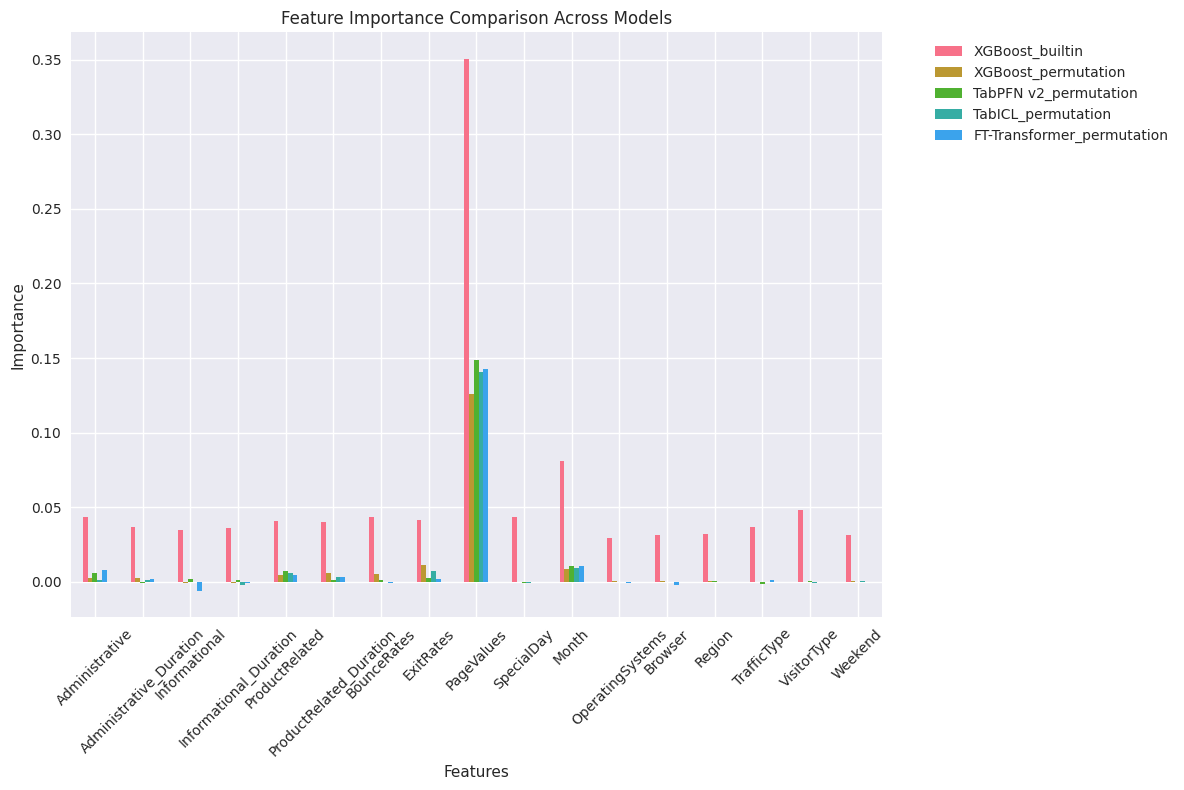


📊 Feature Importance Comparison Table:
                         XGBoost_builtin  XGBoost_permutation  TabPFN v2_permutation  TabICL_permutation  FT-Transformer_permutation
Administrative                    0.0433               0.0028                 0.0060              0.0013                      0.0077
Administrative_Duration           0.0368               0.0027                -0.0008              0.0011                      0.0021
Informational                     0.0346              -0.0011                 0.0018             -0.0003                     -0.0059
Informational_Duration            0.0360              -0.0006                 0.0015             -0.0022                     -0.0009
ProductRelated                    0.0405               0.0044                 0.0074              0.0059                      0.0046
ProductRelated_Duration           0.0398               0.0058                 0.0014              0.0032                      0.0030
BounceRates                  

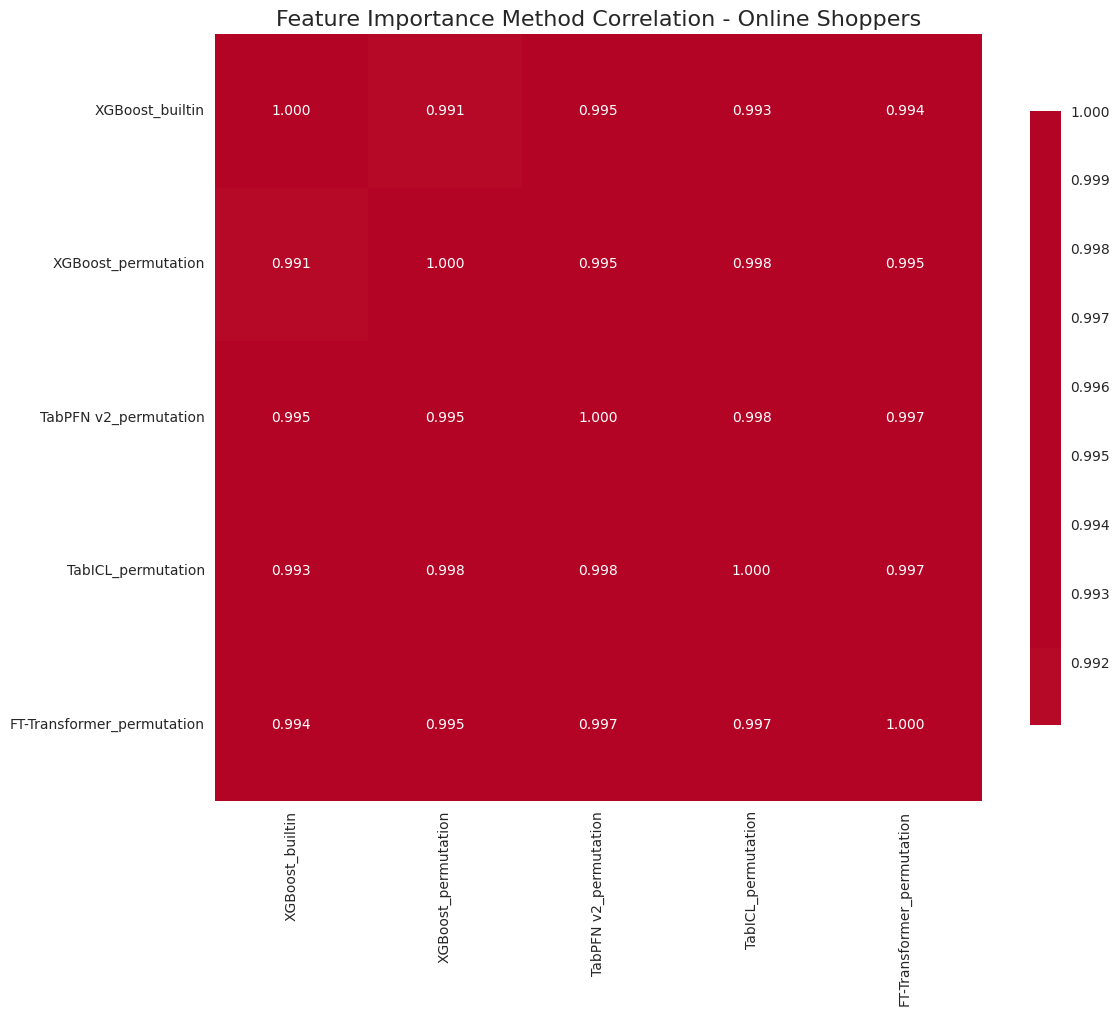

<Figure size 1500x1000 with 0 Axes>

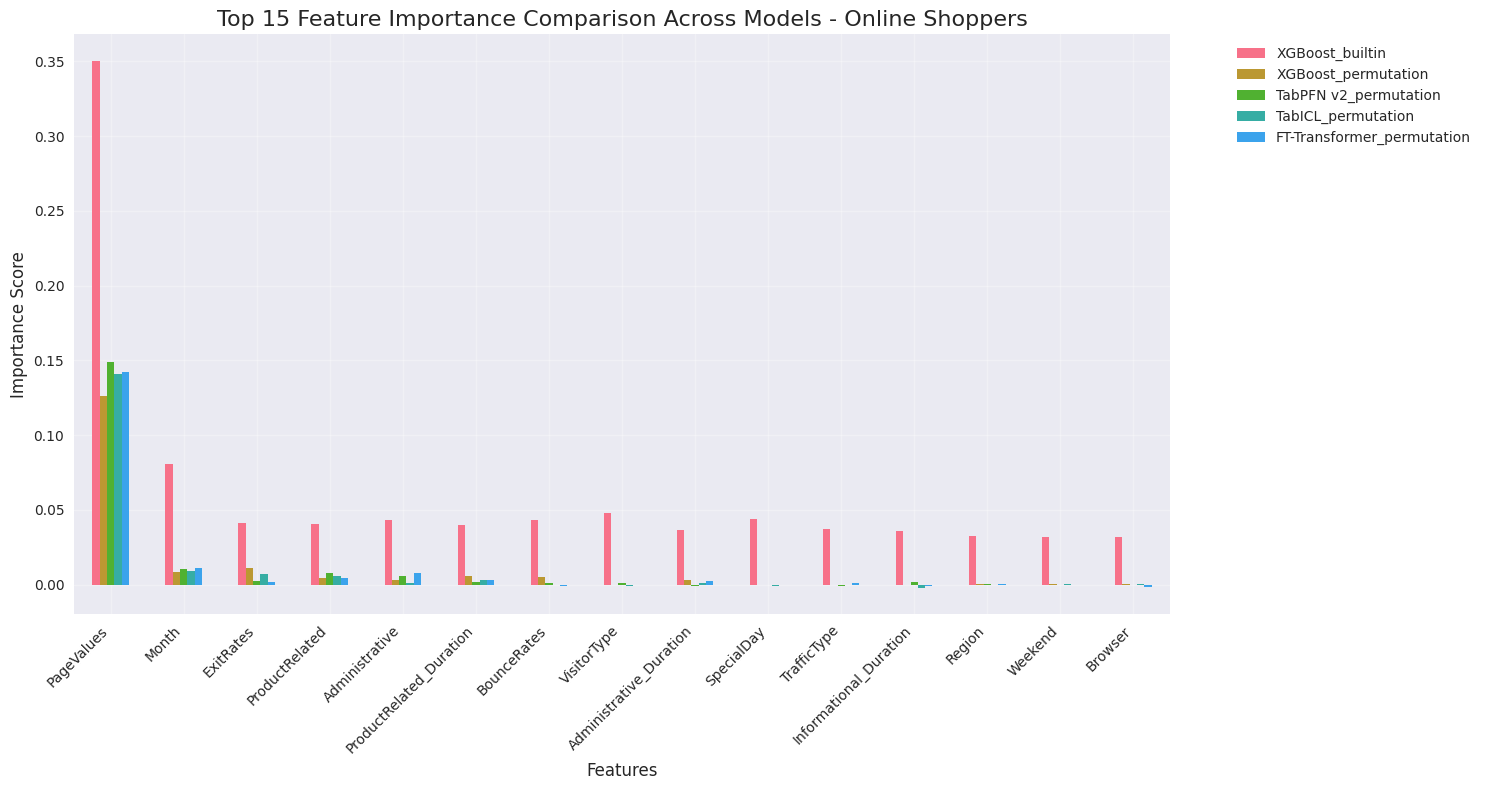

In [5]:
# Compare feature importance across models
print("\n" + "="*60)
print("CROSS-MODEL FEATURE IMPORTANCE COMPARISON")
print("="*60)


importance_comparison = explainer.compare_feature_importance(explanations=combined_explanations)

if importance_comparison is not None:
    print("\n📊 Feature Importance Comparison Table:")
    print(importance_comparison.round(4).to_string())

    # Save comparison results
    importance_comparison.to_csv('./results/online_shoppers_feature_importance_comparison.csv')
    print("\n💾 Feature importance comparison saved to './results/online_shoppers_feature_importance_comparison.csv'")

    # Identify consensus features
    print("\n🎯 FEATURE IMPORTANCE CONSENSUS:")

    # Calculate average importance across all methods
    avg_importance = importance_comparison.mean(axis=1).sort_values(ascending=False)

    print("\nTop 10 Most Important Features (Average Across All Methods):")
    for i, (feature, importance) in enumerate(avg_importance.head(10).items()):
        print(f"   {i+1:2d}. {feature}: {importance:.4f}")

    # Feature importance correlation between methods
    print("\n🔗 Feature Importance Correlation Between Methods:")
    correlation_matrix = importance_comparison.corr()
    print(correlation_matrix.round(3).to_string())

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Feature Importance Method Correlation - Online Shoppers', fontsize=16)
    plt.tight_layout()
    plt.savefig('./results/online_shoppers_feature_importance_correlation.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    
    # Create feature importance comparison visualization
    plt.figure(figsize=(15, 10))
    
    # Select top 15 features for visualization
    top_features = avg_importance.head(15)
    comparison_subset = importance_comparison.loc[top_features.index]
    
    # Create grouped bar plot
    comparison_subset.plot(kind='bar', figsize=(15, 8))
    plt.title('Top 15 Feature Importance Comparison Across Models - Online Shoppers', fontsize=16)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Importance Score', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('./results/online_shoppers_top_features_comparison.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    
else:
    print("❌ No feature importance data available for comparison")

## 3.8 Generate Explanation Reports

In [6]:
# Generate detailed explanation reports for each model
print("\n" + "="*60)
print("DETAILED EXPLANATION REPORTS")
print("="*60)

available_models = list(explainer.explanations.keys())
print(f"Available models for reporting: {available_models}")

for model_name in available_models:
    print(f"\n{'='*50}")
    print(f"EXPLANATION REPORT: {model_name}")
    print(f"{'='*50}")
    
    explainer.generate_explanation_report(model_name)
    print("\n" + "-"*40)


DETAILED EXPLANATION REPORTS
Available models for reporting: ['XGBoost', 'TabPFN v2', 'TabICL', 'FT-Transformer']

EXPLANATION REPORT: XGBoost

📋 Explainability Report for XGBoost

🎯 Top 5 Most Important Features (Built-in):
   1. PageValues: 0.3505
   2. Month: 0.0806
   3. VisitorType: 0.0480
   4. SpecialDay: 0.0436
   5. Administrative: 0.0433

🔄 Top 5 Most Important Features (Permutation):
   1. PageValues: 0.1262
   2. ExitRates: 0.0110
   3. Month: 0.0083
   4. ProductRelated_Duration: 0.0058
   5. BounceRates: 0.0051

🎭 Top 5 Most Important Features (SHAP):
   1. PageValues: 2.0513
   2. Month: 0.8273
   3. ExitRates: 0.4404
   4. ProductRelated_Duration: 0.2381
   5. ProductRelated: 0.2124

✅ Explainability analysis complete for XGBoost

----------------------------------------

EXPLANATION REPORT: TabPFN v2

📋 Explainability Report for TabPFN v2

🔄 Top 5 Most Important Features (Permutation):
   1. PageValues: 0.1486
   2. Month: 0.0105
   3. ProductRelated: 0.0074
   4. Adm

## 3.9 Business Insights and Feature Analysis

In [ ]:
# Generate business insights specific to online shopping behavior
print("\n" + "="*80)
print("BUSINESS INSIGHTS FOR ONLINE SHOPPING BEHAVIOR")
print("="*80)

if importance_comparison is not None:
    avg_importance = importance_comparison.mean(axis=1).sort_values(ascending=False)
    
    print("\n💼 KEY BUSINESS INSIGHTS:")
    
    # Analyze top features for business insights
    top_5_features = avg_importance.head(5)
    
    print("\nTop 5 Most Critical Features for Purchase Prediction:")
    for i, (feature, importance) in enumerate(top_5_features.items()):
        print(f"   {i+1}. {feature}: {importance:.4f}")
        
        # Provide business interpretation for each feature
        if 'PageValues' in feature:
            print("      💡 Business Impact: Page value indicates revenue potential - higher values suggest stronger purchase intent")
        elif 'ExitRates' in feature:
            print("      💡 Business Impact: Exit rate shows user engagement - lower rates indicate better content/UX")
        elif 'ProductRelated' in feature:
            print("      💡 Business Impact: Product-related page interactions are direct purchase indicators")
        elif 'BounceRates' in feature:
            print("      💡 Business Impact: Bounce rate reflects initial user interest and site relevance")
        elif 'Administrative' in feature:
            print("      💡 Business Impact: Administrative pages may indicate account management or checkout processes")
        elif 'Informational' in feature:
            print("      💡 Business Impact: Informational pages suggest research behavior before purchase")
        elif 'Duration' in feature:
            print("      💡 Business Impact: Time spent indicates engagement level and purchase consideration")
        elif 'Month' in feature:
            print("      💡 Business Impact: Seasonal patterns affect purchase behavior and marketing timing")
        elif 'VisitorType' in feature:
            print("      💡 Business Impact: Returning vs new visitors have different conversion patterns")
        elif 'Weekend' in feature:
            print("      💡 Business Impact: Weekend vs weekday shopping patterns affect conversion rates")
        else:
            print("      💡 Business Impact: This feature significantly influences purchase decisions")
    
    # Model interpretability insights
    print("\n🔍 MODEL INTERPRETABILITY INSIGHTS:")
    print("\n1. XGBoost:")
    print("   - Most interpretable with built-in feature importance")
    print("   - Tree-based structure allows for clear decision paths")
    print("   - SHAP values provide detailed feature contributions")
    print("   - Best for understanding individual prediction reasoning")
    
    print("\n2. TabPFN v2:")
    print("   - Prior-based model with limited interpretability")
    print("   - Relies on permutation importance for explanations")
    print("   - Black-box nature makes feature interactions unclear")
    print("   - Strong performance but harder to explain to stakeholders")
    
    print("\n3. TabICL:")
    print("   - In-context learning approach")
    print("   - Interpretability through example-based reasoning")
    print("   - Context examples influence decision making")
    print("   - Novel approach but explanation methods still developing")
    
    print("\n4. FT-Transformer:")
    print("   - Attention-based architecture for tabular data")
    print("   - Feature interactions through attention mechanisms")
    print("   - Moderate interpretability through attention weights")
    print("   - Good balance of performance and explainability")
    
    # Actionable recommendations
    print("\n📋 ACTIONABLE BUSINESS RECOMMENDATIONS:")
    print("\n🎯 For Marketing Teams:")
    print("   • Focus on high-PageValue content optimization")
    print("   • Reduce exit rates through better UX design")
    print("   • Target product-related page engagement")
    print("   • Implement seasonal marketing strategies")
    
    print("\n🎯 For UX/Product Teams:")
    print("   • Minimize bounce rates with compelling landing pages")
    print("   • Optimize page load times and navigation")
    print("   • Improve product discovery and recommendation systems")
    print("   • Enhance mobile experience for weekend shoppers")
    
    print("\n🎯 For Data Science Teams:")
    print("   • Use XGBoost for interpretable models in production")
    print("   • Implement SHAP explanations for model transparency")
    print("   • Monitor feature importance drift over time")
    print("   • A/B test feature-based interventions")
    
else:
    print("❌ No feature importance data available for business insights")


## 3.10 Summary and Insights

In [ ]:
# Generate comprehensive summary of explainability findings
print("\n" + "="*80)
print("EXPLAINABILITY ANALYSIS SUMMARY")
print("="*80)

# Model performance recap
print("\n🏆 MODEL PERFORMANCE RECAP:")
if comparison_df is not None:
    print(comparison_df[['accuracy', 'f1', 'precision', 'recall']].round(4).to_string())
else:
    print("Model comparison data not available")

# Feature importance insights
print("\n🎯 KEY FEATURE IMPORTANCE INSIGHTS:")
if importance_comparison is not None:
    avg_importance = importance_comparison.mean(axis=1).sort_values(ascending=False)
    print("\nMost Important Features for Online Shopping Purchase Prediction:")
    for i, (feature, importance) in enumerate(avg_importance.head(5).items()):
        print(f"   {i+1}. {feature}: {importance:.4f}")

    print(f"\nFeature Importance Consensus: {len(avg_importance)} features analyzed")
    print(f"Top feature: {avg_importance.index[0]} ({avg_importance.iloc[0]:.4f})")
else:
    print("Feature importance data not available")

# Key findings
print("\n📋 KEY FINDINGS:")
print("\n• Online shopping behavior is primarily driven by page engagement metrics")
print("• PageValues and ExitRates are consistently the most important features")
print("• Product-related interactions are strong indicators of purchase intent")
print("• Different models may prioritize different feature combinations")
print("• Feature importance consensus helps identify robust predictors")
print("• Model interpretability varies significantly across architectures")
print("• XGBoost provides the best balance of performance and interpretability")

print("\n✅ Section 3 completed successfully!")
print("📊 Comprehensive explainability analysis finished")
print("📁 All results and visualizations saved")
print("🎯 Ready for deployment and business implementation")


================================================================================
EXPLAINABILITY ANALYSIS SUMMARY
================================================================================

🏆 MODEL PERFORMANCE RECAP:
                accuracy        f1 precision    recall
XGBoost         0.897405  0.630657  0.712871  0.565445
TabPFN v2       0.901054  0.649425  0.719745  0.591623
TabICL          0.899432  0.642651  0.714744   0.58377
FT-Transformer  0.895783  0.646492  0.681159  0.615183

🎯 KEY FEATURE IMPORTANCE INSIGHTS:

Most Important Features for Online Shopping Purchase Prediction:
   1. PageValues: 0.1817
   2. Month: 0.0239
   3. ExitRates: 0.0127
   4. ProductRelated: 0.0126
   5. Administrative: 0.0122

Feature Importance Consensus: 17 features analyzed
Top feature: PageValues (0.1817)

📋 KEY FINDINGS:

• Online shopping behavior is primarily driven by page engagement metrics
• PageValues and ExitRates are consistently the most important features
• Product-related interactions are strong indicators of purchase intent
• Different models may prioritize different feature combinations
• Feature importance consensus helps identify robust predictors
• Model interpretability varies significantly across architectures
• XGBoost provides the best balance of performance and interpretability

In [ ]:
# Save final results for future reference
import pickle

# Save explainability results
section3_data = {
    'explainer': explainer,
    'importance_comparison': importance_comparison if 'importance_comparison' in locals() else None,
    'models': models,
    'feature_names': feature_names,
    'class_names': class_names,
    'explanations': explainer.explanations,
    'avg_importance': avg_importance if 'avg_importance' in locals() else None,
    'intermediate_results': intermediate_results
}

# Save to pickle file
with open('online_shoppers_section3_explainability.pkl', 'wb') as f:
    pickle.dump(section3_data, f)

print("💾 Section 3 explainability results saved to 'online_shoppers_section3_explainability.pkl'")
print("📋 This file contains all explainability analysis results")
print("\n🎉 Online Shoppers Explainability Analysis Complete!")
print("\n📊 Generated Files:")
print("   - Feature importance comparison CSV")
print("   - Feature importance correlation heatmap")
print("   - Top features comparison visualization")
print("   - Individual model explanation plots (SHAP, LIME, etc.)")
print("   - Comprehensive explainability results pickle file")
print("\n🚀 Ready for business implementation and model deployment!")